<a href="https://colab.research.google.com/github/kim-kidong/hello-world/blob/master/01_%ED%8F%90%EC%95%94%EC%9D%98_%EC%96%91%EC%84%B1_%EC%9D%8C%EC%84%B1_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression으로 폐암의 양성 음성 분류

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

이번 실습에서 사용하는 데이터는  폐암의 양성, 음성 여부를 구분하는 문제입니다.

### 1.1 Data Load
데이터는 `sklearn.datasets` 의 `load_breast_cancer` 함수를 이용해 받을 수 있습니다.

In [ ]:
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

데이터에서 사용되는 변수명을 확인하면 다음과 같습니다.
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

In [ ]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

정답을 확인하면 다음과 같습니다:
- malignant
- benign

0은 양성, 1은 음성을 뜻합니다.

In [ ]:
cancer["target_names"]

array(['malignant', 'benign'], dtype='<U9')

데이터와 정답을 확인해 보겠습니다.

In [ ]:
data, target = cancer["data"], cancer["target"]

In [ ]:
data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
target[0]

0

### 1.2 Data EDA

In [ ]:
df = pd.DataFrame(data, columns=cancer["feature_names"])
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
data.shape

(569, 30)

양성과 음성의 비율은 다음과 같습니다.

In [ ]:
pd.Series(target).value_counts()

1    357
0    212
dtype: int64

Histogram으로 그리면 다음과 같습니다.

(array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 357.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

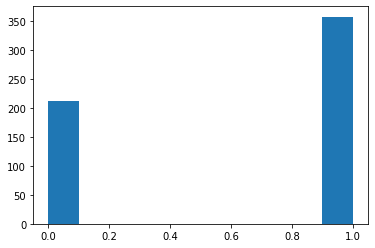

In [ ]:
plt.hist(target)

mean radius와 정답간의 상관관계를 plot으로 그리면 다음과 같습니다.  
mean radius가 클 경우 음성인 것을 확인할 수 있습니다.

Text(0, 0.5, 'target')

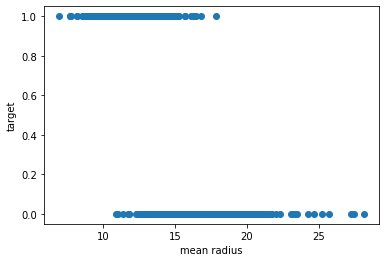

In [ ]:
plt.scatter(x=data[:,0], y=target)
plt.xlabel("mean radius")
plt.ylabel("target")

### 1.3 Data Split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state=2021,
)

In [ ]:
print("train data 개수:", len(train_data))
print("test data 개수:", len(test_data))

train data 개수: 398
test data 개수: 171


## 2. Linear Regression and Categorical Label

Logistic Regression을 학습하기에 앞서 Linear Regression으로 학습할 경우 어떻게 되는지 확인해 보겠습니다.

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

### 2.1 학습

In [ ]:
linear_regressor.fit(train_data, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 2.2 예측

In [ ]:
train_pred = linear_regressor.predict(train_data)
test_pred = linear_regressor.predict(test_data)

예측한 결과를 보면 0~1사이를 벗어난 예측값을 많이 볼 수 있습니다.

In [ ]:
train_pred[:10]

array([ 0.65079698, -0.33739828,  0.76995559,  1.07473181,  0.98981797,
       -0.14066351,  0.91330917,  0.56950769,  1.12592692,  1.08459606])

### 2.3 시각화

mean_radius의 값에 변화에 따른 예측한 결과를 시각화하면 다음과 같습니다.  
전체적으로 우하향하는 예측을 하는 것을 알 수 있습니다.

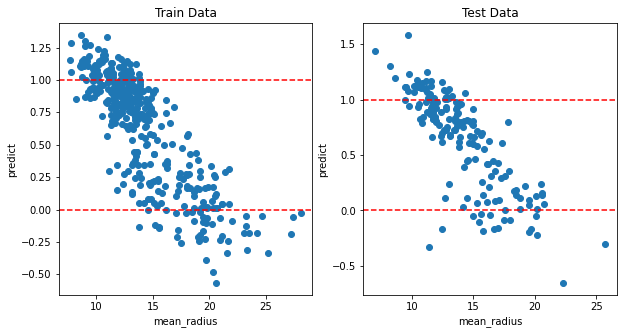

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred),
]
for idx, (name, d, pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color="red", linestyle="--")
    ax.axhline(1, color="red", linestyle="--")
    ax.set_xlabel("mean_radius")
    ax.set_ylabel("predict")
    ax.set_title(f"{name} Data")

### 2.4 평가하기

Linear Regression의 성능을 측정하기 위해서는 우선 예측값을 0과 1로 변환시켜줘야 합니다.  
강의에서 배웠던 Youden's Index를 이용해 Best Threshold를 찾은 후 0과 1로 변화시킨 후 정확도를 보겠습니다.  

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred)
auroc = auc(fpr, tpr)

In [ ]:
fpr

array([0.        , 0.        , 0.        , 0.00675676, 0.00675676,
       0.01351351, 0.01351351, 0.02027027, 0.02027027, 0.02702703,
       0.02702703, 0.05405405, 0.05405405, 0.10810811, 0.10810811,
       1.        ])

In [ ]:
tpr

array([0.   , 0.004, 0.86 , 0.86 , 0.928, 0.928, 0.98 , 0.98 , 0.988,
       0.988, 0.992, 0.992, 0.996, 0.996, 1.   , 1.   ])

In [ ]:
threshold

array([ 2.3431729 ,  1.3431729 ,  0.74268219,  0.74137999,  0.69609319,
        0.68867913,  0.63316544,  0.62480986,  0.58612053,  0.58042965,
        0.57594808,  0.55461919,  0.53720045,  0.44439165,  0.44218128,
       -0.56296658])

우선 AUROC 를 그려보겠습니다.

Text(0, 0.5, 'tpr')

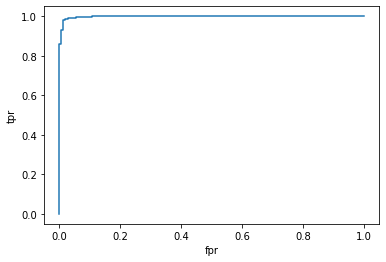

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

AUROC 값을 계산하면 다음과 같습니다.

In [ ]:
print(f"AUROC : {auroc:.4f}")

AUROC : 0.9979


이제 Best Threshold를 계산해 보겠습니다.

In [ ]:
np.argmax(tpr - fpr)

8

In [ ]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh = threshold[idx]
print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

Best Threshold is 0.5861
Best Threshold's sensitivity is 0.9880
Best Threshold's specificity is 0.9797
Best Threshold's J is 0.9677


Best Threshold는 AUROC 그래프에서 직선이 가장 긴 곳입니다.  
한번 Plot을 직접 그려보겠습니다.

Text(0, 0.5, 'tpr')

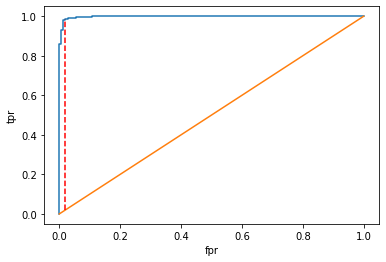

In [ ]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx], fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

예측값에서의 Best threshold의 위치를 그려보겠습니다.

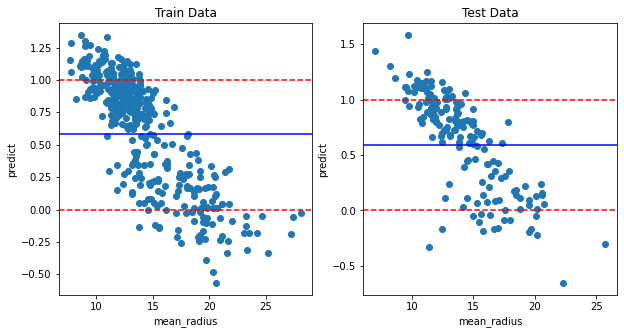

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

preds = [
    ("Train", train_data, train_pred),
    ("Test", test_data, test_pred),
]
for idx, (name, d, pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(x=d[:,0], y=pred)
    ax.axhline(0, color="red", linestyle="--")
    ax.axhline(1, color="red", linestyle="--")
    ax.set_xlabel("mean_radius")
    ax.set_ylabel("predict")
    ax.set_title(f"{name} Data")
    ax.axhline(best_thresh, color="blue")

이제 Threshold로 예측값을 0,1로 변환 후 정확도를 보겠습니다.

In [ ]:
train_pred_label = list(map(int, (train_pred > best_thresh)))
test_pred_label = list(map(int, (test_pred > best_thresh)))

In [ ]:
from sklearn.metrics import accuracy_score


linear_train_accuracy = accuracy_score(train_target, train_pred_label)
linear_test_accuracy = accuracy_score(test_target, test_pred_label)

In [ ]:
print(f"Train accuracy is : {linear_train_accuracy:.2f}")
print(f"Test accuracy is : {linear_test_accuracy:.2f}")

Train accuracy is : 0.98
Test accuracy is : 0.96


## 3. Logistic Regression

이번에는 Logistic Regression을 이용해 예측을 해보겠습니다.

### 3.1 Scaling

Logistic Regression은 학습하기에 앞서 학습시킬 데이터를 정규화해야 합니다.  
Logistic Regressiond에는 exp가 있는데, exp는 값이 클 경우 overflow가 일어날 수 있기 때문입니다.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

정규화는 항상 train data를 이용해 학습하고 valid, test 데이터를 변환해야 합니다.  
모든 데이터를 한번에 학습할 경우 본 적이 없는 valid data의 평균과 분산이 반영되고 이는 overfitting을 일으키는 원인이 됩니다.  

In [ ]:
scaler.fit(train_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

학습된 scaler로 train/ test 데이터를 변환합니다.

In [ ]:
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [ ]:
train_data[0]

array([1.130e+01, 1.819e+01, 7.393e+01, 3.894e+02, 9.592e-02, 1.325e-01,
       1.548e-01, 2.854e-02, 2.054e-01, 7.669e-02, 2.428e-01, 1.642e+00,
       2.369e+00, 1.639e+01, 6.663e-03, 5.914e-02, 8.880e-02, 1.314e-02,
       1.995e-02, 8.675e-03, 1.258e+01, 2.796e+01, 8.716e+01, 4.729e+02,
       1.347e-01, 4.848e-01, 7.436e-01, 1.218e-01, 3.308e-01, 1.297e-01])

In [ ]:
scaled_train_data[0]

array([-0.77241528, -0.25350148, -0.71766034, -0.72713135, -0.05609214,
        0.52832818,  0.80418063, -0.54281688,  0.8826752 ,  1.92363784,
       -0.56190665,  0.82998234, -0.22721273, -0.4934605 , -0.1485608 ,
        1.83202549,  1.75089411,  0.22238033, -0.03320069,  1.67142344,
       -0.74402208,  0.36363441, -0.58496884, -0.70201562,  0.06028267,
        1.48259627,  2.23558836,  0.09272995,  0.71316397,  2.55107451])

### 3.2 학습

이제 표준화된 데이터로 Logistic Regression을 학습해 보겠습니다.

In [ ]:
from sklearn.linear_model import LogisticRegression

logit_regressor = LogisticRegression()

In [ ]:
logit_regressor.fit(scaled_train_data, train_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 3.3 예측

Classification 을 하는 모델의 경우 예측을 하는 방법은 두 가지가 있습니다.
1. `predict`
2. `predict_proba`

`predict`는 해당 데이터가 어떤 class로 분류할지 바로 알려줍니다.  
반면, `predict_proba`는 각 class에 속할 확률을 보여줍니다.

In [ ]:
train_pred = logit_regressor.predict(scaled_train_data)
test_pred = logit_regressor.predict(scaled_test_data)

In [ ]:
train_pred[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [ ]:
train_pred_logit = logit_regressor.predict_proba(scaled_train_data)
test_pred_logit = logit_regressor.predict_proba(scaled_test_data)

In [ ]:
train_pred_logit[:10]

array([[9.77486880e-03, 9.90225131e-01],
       [9.99999999e-01, 1.10444571e-09],
       [2.00315051e-02, 9.79968495e-01],
       [1.74273407e-06, 9.99998257e-01],
       [4.94023919e-04, 9.99505976e-01],
       [9.99999933e-01, 6.70359495e-08],
       [2.92533805e-04, 9.99707466e-01],
       [8.26176477e-01, 1.73823523e-01],
       [1.33303137e-04, 9.99866697e-01],
       [5.72177528e-05, 9.99942782e-01]])

각 class에 속할 확률은 다음과 같습니다.  
현재 데이터의 경우 양성과 음성 2개의 클래스가 있기 때문에 2개의 확률이 나타납니다.    
만약 첫 번째 class에 속할 확률이 크다면 데이터는 0번 클래스에 속하게 됩니다.

In [ ]:
train_pred_logit[0]

array([0.00977487, 0.99022513])

### 3.4 평가

데이터의 AUROC를 계산하기 위해서는 1의 클래스로 분류될 확률 하나만 필요합니다.   
반면 우리가 갖고 있는 예측값은 0과 1로 분류될 확률을 모두 표시하고 있습니다.  
그래서 1에 속할 확률만 남기겠습니다.

In [ ]:
train_pred_logit = train_pred_logit[:, 1]
test_pred_logit = test_pred_logit[:, 1]

In [ ]:
train_pred_logit[0]

0.9902251312004176

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(train_target, train_pred_logit)
auroc = auc(fpr, tpr)

Text(0, 0.5, 'tpr')

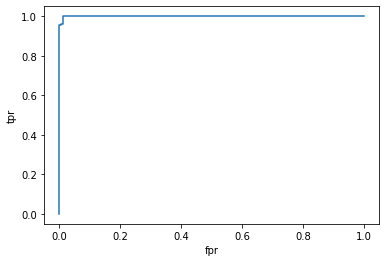

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")

In [ ]:
print(f"AUROC : {auroc:.4f}")

AUROC : 0.9994


In [ ]:
J = tpr - fpr
idx = np.argmax(J)
best_thresh = threshold[idx]

print(f"Best Threshold is {best_thresh:.4f}")
print(f"Best Threshold's sensitivity is {tpr[idx]:.4f}")
print(f"Best Threshold's specificity is {1-fpr[idx]:.4f}")
print(f"Best Threshold's J is {J[idx]:.4f}")

Best Threshold is 0.4433
Best Threshold's sensitivity is 1.0000
Best Threshold's specificity is 0.9865
Best Threshold's J is 0.9865


Text(0, 0.5, 'tpr')

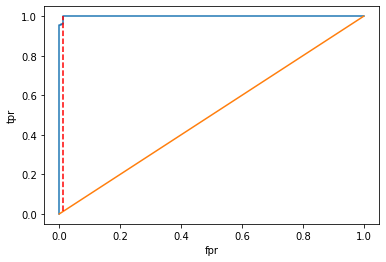

In [ ]:
plt.plot(fpr, tpr)
plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
plt.plot((fpr[idx],fpr[idx]), (fpr[idx], tpr[idx]), color="red", linestyle="--")
plt.xlabel("fpr")
plt.ylabel("tpr")

Text(0, 0.5, 'Probability')

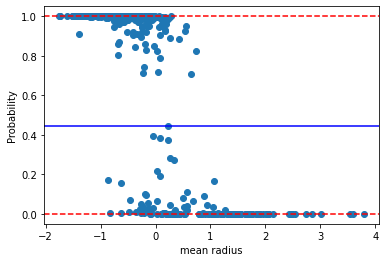

In [ ]:
plt.scatter(x=scaled_train_data[:,0], y=train_pred_logit)
plt.axhline(best_thresh, color="blue")
plt.axhline(0, color="red", linestyle="--")
plt.axhline(1, color="red", linestyle="--")
plt.xlabel("mean radius")
plt.ylabel("Probability")

이제 Threshold로 예측값을 0,1로 변환 후 정확도를 보겠습니다.

In [ ]:
train_pred_label = list(map(int, (train_pred_logit > best_thresh)))
test_pred_label = list(map(int, (test_pred_logit > best_thresh)))

In [ ]:
proba_train_accuracy = accuracy_score(train_target, train_pred_label)
proba_test_accuracy = accuracy_score(test_target, test_pred_label)

In [ ]:
print(f"Train accuracy is : {proba_train_accuracy:.2f}")
print(f"Test accuracy is : {proba_test_accuracy:.2f}")

Train accuracy is : 0.99
Test accuracy is : 0.96


이번에는 `predict` 의 결과값으로 정확도를 보겠습니다.

In [ ]:
train_accuracy = accuracy_score(train_target, train_pred)
test_accuracy = accuracy_score(test_target, test_pred)

In [ ]:
print(f"Train accuracy is : {train_accuracy:.2f}")
print(f"Test accuracy is : {test_accuracy:.2f}")

Train accuracy is : 0.99
Test accuracy is : 0.97


`predict_proba`의 best_threshold로 계산한 결과와 `predict`로 계산한 결과가 다릅니다.  
이는 두 0과 1로 예측하는 방법이 다르기 때문입니다.  
예를 들어서 (0.49, 0.51)의 확률이 있을 때 `predict`의 경우 class 1의 확률에 속할 확률이 크기 때문에 1로 분류합니다.  
하지만 best_threshold가 0.52라면 `predict_proba`의 경우 class를 0으로 분류하게 됩니다.  

## 4. 마무리

세개의 모델들의 정확도를 비교해 보겠습니다.

In [ ]:
print(f"Linear Regression Test Accuracy: {linear_test_accuracy:.2f}")
print(f"Logistic Regression predict_proba Test Accuracy: {proba_test_accuracy:.2f}")
print(f"Logistic Regression predict Test Accuracy: {test_accuracy:.2f}")

Linear Regression Test Accuracy: 0.96
Logistic Regression predict_proba Test Accuracy: 0.96
Logistic Regression predict Test Accuracy: 0.97
